<a href="https://colab.research.google.com/github/fabianhuertas1992/DatosML/blob/main/Machine%20Learning/ML_comparativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Modelos de Machine Learning Comparativos**


Modelos con el total de los datos sin agrupar por parcelas, se realiza modelos de predicción y comparativos


Este código implementa un **comparativo de tres modelos de Machine Learning (XGBoost, Regresión Lineal, y Random Forest)** para predecir la **biomasa (en Mg/ha)** en función de varias características, y luego genera gráficas para comparar el rendimiento de cada modelo.

### 1. **Carga y Preprocesamiento de Datos**
- Se carga el `dataframemg` y se eliminan los valores faltantes (`NaN`) usando `dropna()`.
- Se generan nuevas características a partir de las columnas existentes:
  - `NDVI_DAP`: Relación entre el índice de vegetación NDVI y el diámetro del árbol a la altura del pecho (DAP).
  - `HT_NDVI`: Producto de la altura del árbol y el valor del NDVI.
  
  Estas nuevas características pueden aportar más información útil para los modelos de predicción.

### 2. **Selección de Características y Escalado**
- Se seleccionan cinco características numéricas clave: `NDVI`, `Diametro 1 Altura del Pecho DAP (cm)`, `HT altura del árbol o del fuste 1 (mt)`, `NDVI_DAP`, y `HT_NDVI`.
- Luego, los datos son escalados utilizando `StandardScaler`, que transforma los valores para que tengan una media de 0 y una desviación estándar de 1. Esto mejora el rendimiento de algunos modelos (como Regresión Lineal y XGBoost).

### 3. **División del Conjunto de Datos**
- El conjunto de datos se divide en conjuntos de **entrenamiento (80%) y prueba (20%)** utilizando `train_test_split`. El conjunto de prueba se usará para evaluar el rendimiento de los modelos.

### 4. **Entrenamiento y Evaluación de los Modelos**
#### - **Modelo 1: XGBoost**
   - Se define una rejilla de hiperparámetros (`param_grid_xgb`) con varias combinaciones de parámetros para ajustar el modelo de XGBoost.
   - Se utiliza `GridSearchCV` para buscar la mejor combinación de hiperparámetros mediante validación cruzada de 5 pliegues.
   - El modelo resultante es ajustado con los datos de entrenamiento y se predicen los valores del conjunto de prueba. Luego, se calculan el **Mean Squared Error (MSE)** y el **R²** como métricas de evaluación del modelo.

#### - **Modelo 2: Regresión Lineal**
   - Un modelo de regresión lineal se ajusta a los datos de entrenamiento y se evalúa en el conjunto de prueba usando las mismas métricas.

#### - **Modelo 3: Random Forest**
   - Similar a XGBoost, se define una rejilla de hiperparámetros para ajustar un modelo de Random Forest y se busca la mejor configuración utilizando `GridSearchCV`.
   - Después del ajuste, el modelo se evalúa en el conjunto de prueba calculando MSE y R².

### 5. **Gráficas de Comparación**
Se generan cuatro gráficos:
   1. **Gráfico de XGBoost**: Compara las predicciones del modelo XGBoost con los valores reales del conjunto de prueba. Se muestra el **MSE** y el **R²**.
   2. **Gráfico de Regresión Lineal**: Similar al de XGBoost, pero para el modelo de regresión lineal.
   3. **Gráfico de Random Forest**: Compara las predicciones de Random Forest con los valores reales.
   4. **Gráfico Comparativo de los Tres Modelos**: Se superponen las predicciones de los tres modelos en un solo gráfico para compararlos directamente.

### 6. **Conclusión del Código**
El código permite comparar visualmente y numéricamente los tres modelos de predicción en términos de:
- **MSE (Error Cuadrático Medio)**: Un valor más bajo indica un mejor rendimiento del modelo.
- **R² (Coeficiente de determinación)**: Un valor cercano a 1 indica que el modelo predice bien los datos.

Al final, puedes ver cuál de los tres modelos predice mejor la biomasa observada en base a las características del NDVI, diámetro a la altura del pecho, y altura del árbol.

Este enfoque de comparación es útil para elegir el modelo que mejor se ajusta a tus datos en términos de precisión de predicción.

## Librerias y Conexión con Datos

In [ ]:
# @title Instalacion de librerias
!pip install rasterio
!pip install SQLAlchemy aiomysql
!pip install geopandas
!pip install folium
!pip install boto3

In [ ]:
# @title Montar acceso Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Conectar con DB de Kobo
#Importa los datos de KOBOTOOLS y crea un DF
#Archivo KOBO aplicacion
import pandas as pd

# URL del archivo CSV generado por KoboToolbox
url = "https://kf.kobotoolbox.org/api/v2/assets/a44ciRM8GHh5XHyJu4XEKn/export-settings/esprBMMCYyNhWz6bF8YKTqy/data.csv"  # Reemplaza con la URL real del archivo CSV

# Leer el archivo CSV usando pandas con delimitador de punto y coma
df = pd.read_csv(url, delimiter=';')
df

,"El Ministerio de Ciencia, Tecnología e Innovación, a través del Sistema General de Regalías (SGR), viabilizó, priorizó y aprobó el proyecto BPIN 2022000100005 denominado “Implementación de acciones para la protección de cuencas de agua y suelos a partir de reforestación con tecnologías emergentes y biotecnología en la región llanos orientales en los departamentos de Meta y Arauca”, designando como entidad ejecutora a la UNIVERSIDAD COOPERATIVA DE COLOMBIA, identificada con NIT 860.029.924-7 y designada como co-ejecutorora a la CORPORACION INNPRENDE identificada con NIT 901243061-0. En el proceso de ejecución del proyecto, adelantamos consultas relacionadas con el mismo, como el formulario que se presenta a continuación:\nEste formulario facilita el protocolo de caracterización de las especies del bosque",Seleccione el nombre de su proyecto en Plataforma,Diligenciado por,ID Conglomerado,Fecha de diligenciamiento,ID Subparcela,No ID individuo,Seleccione la categoría por tamaño del individuo,Foto de la identificación del árbol,Foto de la identificación del árbol_URL,...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,NaN,ELTESORODEBREMEN,Jose Quiñones,3,2023-05-22,3,NaN,Fustales Grandes (DAP ≥ 30 cm),IMG_20230522_103221_465-10_32_45-9_52_57.webp,https://kc.kobotoolbox.org/media/original?medi...,...,241886028,fa2fb73e-4199-450f-ae55-840994aa24c1,2023-05-29 14:54:52,NaN,NaN,submitted_via_web,NaN,vP79Ps3bBNoBCBpSuJFkcq,NaN,1
1,NaN,El Aguador,Sebastian Plata,1,2023-05-15,1,1.0,Fustales (30 cm > DAP ≥ 10 cm),1684163266955-10_1_7.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,241886878,7b354705-ad2f-490b-855d-ac7b63d075b1,2023-05-29 14:56:48,NaN,NaN,submitted_via_web,suanblockchain,vP79Ps3bBNoBCBpSuJFkcq,NaN,2
2,NaN,El Aguador,Sebastian Plata,1,2023-05-15,1,8.0,Fustales (30 cm > DAP ≥ 10 cm),1684166403215-19_49_16.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,241992703,8de91169-a043-4cf2-9518-11c5dc8c7910,2023-05-30 00:51:46,NaN,NaN,submitted_via_web,moxie,vP79Ps3bBNoBCBpSuJFkcq,NaN,3
3,NaN,El Aguador,Sebastian Plata,1,2023-05-15,1,6.0,Fustales Grandes (DAP ≥ 30 cm),1684165653222-18_50_25.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,242623494,382bb858-4fbe-4333-bab7-0a78c284b340,2023-05-31 23:51:41,NaN,NaN,submitted_via_web,suanblockchain,vP79Ps3bBNoBCBpSuJFkcq,NaN,4
4,NaN,El Aguador,Sebastian Plata,1,2023-05-15,1,2.0,Fustales (30 cm > DAP ≥ 10 cm),1684163686851-18_53_45.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,242623797,a6efa90a-3ef0-4984-91f8-60c03085a367,2023-05-31 23:55:28,NaN,NaN,submitted_via_web,suanblockchain,vP79Ps3bBNoBCBpSuJFkcq,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,NaN,ACAP ALABANIA PROYECTO VJOSE-NARTE A/R,Jhony López,1,2024-08-22,4,409.0,Fustales Grandes (DAP ≥ 30 cm),image-16_55_51.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,374834627,76b2b49f-32fd-4bef-bff3-820355f3c3a9,2024-08-23 12:23:59,NaN,NaN,submitted_via_web,NaN,v8zoTcwyYNqhruKiGTxepa,NaN,524
524,NaN,ACAP ALABANIA PROYECTO VJOSE-NARTE A/R,Carlos soto,1,2024-08-22,3,405.0,Fustales (30 cm > DAP ≥ 10 cm),image-16_48_18.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,374906505,15a81e26-e569-46a2-912b-105e482ff52e,2024-08-23 15:19:03,NaN,NaN,submitted_via_web,NaN,v8zoTcwyYNqhruKiGTxepa,NaN,525
525,NaN,ACAP ALABANIA PROYECTO VJOSE-NARTE A/R,Carlos Soto,1,2024-08-22,3,407.0,Fustales (30 cm > DAP ≥ 10 cm),image-16_51_19.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,374906742,eb663ad0-9118-4990-b1bb-1ca9b064a6e8,2024-08-23 15:19:40,NaN,NaN,submitted_via_web,NaN,v8zoTcwyYNqhruKiGTxepa,NaN,526
526,NaN,ACAP ALABANIA PROYECTO VJOSE-NARTE A/R,Carlos Soto,1,2024-08-22,3,408.0,Fustales (30 cm > DAP ≥ 10 cm),image-16_54_25.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,374908049,921ebfc9-96ec-4a34-9def-427b9bb64737,2024-08-23 15:23:16,NaN,NaN,submitted_via_web,NaN,v8z

In [ ]:
# @title Seleccionar únicamente las columnas de ubicación
df_filtered = df[['ID Subparcela','Ubicación GPS','_Ubicación GPS_latitude', '_Ubicación GPS_longitude','_Ubicación GPS_altitude','_Ubicación GPS_precision',
                  'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt','Azimut','Distancia',
                  'Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.)',
                  'HT altura del árbol o del fuste 1 (mt)']]
df_filtered

,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.100000,10.200000,39.0,0.0,0,NaN,15
1,1,4.9317239 -75.0297909 1411.7 3.9000000953674316,4.931724,-75.029791,1411.700000,3.900000,12.0,0.0,0,NaN,3
2,1,4.93175 -75.0297246 1419 4.328999996185303,4.931750,-75.029725,1419.000000,4.329000,18.2,NaN,NaN,NaN,2.5
3,1,4.93183 -75.0297517 1419.2 3.9000000953674316,4.931830,-75.029752,1419.200000,3.900000,97.4,NaN,NaN,NaN,12
4,1,4.931775 -75.029688 1431.1000000000001 3.90000...,4.931775,-75.029688,1431.100000,3.900000,24.0,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...
523,4,6.595624 -71.693078 246.48771116137505 7.95790...,6.595624,-71.693078,246.487711,7.957906,44.0,26.0,12,NaN,12
524,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,15.0,NaN,11,NaN,12
525,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,15.0,NaN,11,NaN,15
526,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,22.0,NaN,1,NaN,15


In [ ]:
# @title total de nulos NAN
df_filtered.isna().sum()

,0
ID Subparcela,0
Ubicación GPS,260
_Ubicación GPS_latitude,260
_Ubicación GPS_longitude,260
_Ubicación GPS_altitude,260
_Ubicación GPS_precision,260
"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",35
Azimut,273
Distancia,265
Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),528


In [ ]:
# @title Reemplaza nulos por ceros
df_filtered = df_filtered.fillna(0)
df.update(df_filtered)
df_filtered.isna().sum()

,0
ID Subparcela,0
Ubicación GPS,0
_Ubicación GPS_latitude,0
_Ubicación GPS_longitude,0
_Ubicación GPS_altitude,0
_Ubicación GPS_precision,0
"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",0
Azimut,0
Distancia,0
Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),0


In [ ]:
data = df_filtered

# Cálculo Biomasa Datos Kobo


In [ ]:
# @title  Biomasa registros
import numpy as np

def calcular_biomasa(dap, densidad=0.534):
    # Verifica que los valores no sean nulos o incorrectos
    if pd.isnull(dap) or dap <= 0:
        return np.nan

    # Calcula la biomasa usando la fórmula
    ln_biomasa = 3.652 - 1.697 * np.log(dap) + 1.169 * (np.log(dap))**2 - 0.122 * (np.log(dap))**3 + 1.285 * np.log(densidad)
    biomasa = np.exp(ln_biomasa)
    return biomasa

    # La columna de DAP se llama 'Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt'
data['Biomasa (kg)'] = data['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt'].apply(calcular_biomasa)

biomasa_total = data['Biomasa (kg)'].sum()
print(f'Biomasa total: {biomasa_total:.2f} kg')
data

Biomasa total: 91527.91 kg


,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt),Biomasa (kg)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.100000,10.200000,39.0,0.0,0,0.0,15,555.487004
1,1,4.9317239 -75.0297909 1411.7 3.9000000953674316,4.931724,-75.029791,1411.700000,3.900000,12.0,0.0,0,0.0,3,53.267172
2,1,4.93175 -75.0297246 1419 4.328999996185303,4.931750,-75.029725,1419.000000,4.329000,18.2,0.0,0,0.0,2.5,119.489181
3,1,4.93183 -75.0297517 1419.2 3.9000000953674316,4.931830,-75.029752,1419.200000,3.900000,97.4,0.0,0,0.0,12,2624.525247
4,1,4.931775 -75.029688 1431.1000000000001 3.90000...,4.931775,-75.029688,1431.100000,3.900000,24.0,0.0,0,0.0,6,209.266439
...,...,...,...,...,...,...,...,...,...,...,...,...
523,4,6.595624 -71.693078 246.48771116137505 7.95790...,6.595624,-71.693078,246.487711,7.957906,44.0,26.0,12,0.0,12,701.406182
524,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,15.0,0.0,11,0.0,12,81.476629
525,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,15.0,0.0,11,0.0,15,81.476629
526,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,22.0,0.0,1,0.0,15,175.303444


In [ ]:
# @title Cálculo de Biomasa del los puntos dentro del polígono
import requests
import folium
from shapely.geometry import shape, Point
from shapely.ops import transform
from pyproj import Transformer
from IPython.display import IFrame
import pandas as pd
import numpy as np

# Función para calcular la biomasa
def calcular_biomasa(dap, densidad=0.534):
    if pd.isnull(dap) or dap <= 0:
        return np.nan
    ln_biomasa = 3.652 - 1.697 * np.log(dap) + 1.169 * (np.log(dap))**2 - 0.122 * (np.log(dap))**3 + 1.285 * np.log(densidad)
    biomasa = np.exp(ln_biomasa)
    return biomasa

# Función para obtener el polígono basado en coordenadas
def obtener_poligono_por_geometria(lat, lon, radio=10):
    BASE_URL = "https://services2.arcgis.com/RVvWzU3lgJISqdke/ArcGIS/rest/services/CATASTRO_PUBLICO_Junio_30_2024/FeatureServer/"
    tableNumber = 14
    COMMAND = "query"

    query = {
        'geometry': f"{lon},{lat}",
        'geometryType': 'esriGeometryPoint',
        'inSR': '4326',
        'spatialRel': 'esriSpatialRelIntersects',
        'distance': radio,
        'units': 'esriSRUnit_Meter',
        'returnGeometry': 'true',
        'outFields': '*',
        'f': 'geojson',
        'resultRecordCount': 1
    }

    URL = f"{BASE_URL}/{tableNumber}/{COMMAND}"
    response = requests.get(URL, params=query)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Cargar los datos y calcular la biomasa
data['Biomasa (kg)'] = data['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt'].apply(calcular_biomasa)

# Definir la ID Catastral objetivo
id_catastral_objetivo = '632720000000000010644000000000'
poligono_encontrado = None

# Iterar sobre las filas del DataFrame para buscar el polígono de la ID Catastral específica
for idx, row in data.iterrows():
    lat = row['_Ubicación GPS_latitude']
    lon = row['_Ubicación GPS_longitude']

    resultado = obtener_poligono_por_geometria(lat, lon)
    if resultado and resultado['features']:
        for feature in resultado['features']:
            id_catastral = feature['properties'].get('CODIGO')
            if id_catastral == id_catastral_objetivo:
                poligono_encontrado = feature['geometry']
                break
    if poligono_encontrado:
        break

# Verificar si se encontró el polígono y calcular el área en hectáreas
if poligono_encontrado:
    # Convertir la geometría del polígono a objeto Shapely
    poligono_principal = shape(poligono_encontrado)

    # Transformar las coordenadas geográficas (EPSG:4326) a un sistema métrico (EPSG:3857)
    transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
    poligono_transformado = transform(transformer.transform, poligono_principal)

    # Calcular el área del polígono transformado en metros cuadrados y convertir a hectáreas
    area_poligono_principal_m2 = poligono_transformado.area
    area_poligono_principal_ha = area_poligono_principal_m2 / 10000  # Convertir de m² a hectáreas

    # Filtrar subparcelas que caen dentro del polígono
    subparcelas_filtradas = data[data.apply(lambda row: poligono_principal.contains(Point(row['_Ubicación GPS_longitude'], row['_Ubicación GPS_latitude'])), axis=1)]

    # Crear un DataFrame con los datos filtrados
    dataframe_filtrado = pd.DataFrame(subparcelas_filtradas)

    # Calcular la biomasa total sumando todas las subparcelas
    biomasa_total_kg = dataframe_filtrado['Biomasa (kg)'].sum()

    # Calcular el área total estimada de subparcelas
    radio = 15  # Radio en metros
    area_subparcela_m2 = np.pi * (radio ** 2)
    area_total_subparcelas_m2 = area_subparcela_m2 * len(dataframe_filtrado)
    area_total_subparcelas_ha = area_total_subparcelas_m2 / 10000  # Convertir de m² a hectáreas

    # Convertir la biomasa de kg a megagramos (Mg) y luego a Mg/ha para el área total
    biomasa_total_mg = biomasa_total_kg / 1000  # Convertir kg a Mg
    biomasa_total_mg_ha = biomasa_total_mg / area_total_subparcelas_ha  # Convertir a Mg/ha

    # Crear un mapa centrado en la primera ubicación encontrada
    lat_central = dataframe_filtrado['_Ubicación GPS_latitude'].mean()
    lon_central = dataframe_filtrado['_Ubicación GPS_longitude'].mean()
    mapa = folium.Map(location=[lat_central, lon_central], zoom_start=15)

    # Agregar el polígono principal al mapa
    folium.GeoJson(poligono_principal, name=f"ID: {id_catastral_objetivo}").add_to(mapa)

    # Convertir el radio de 15 metros a grados aproximadamente para el uso en el mapa
    METROS_A_GRADOS = 1 / 111320
    radio_en_grados = radio * METROS_A_GRADOS

    # Agregar los círculos al mapa y mostrar la información
    for _, subparcela in dataframe_filtrado.iterrows():
        lat = subparcela['_Ubicación GPS_latitude']
        lon = subparcela['_Ubicación GPS_longitude']

        # Dibujar un círculo de 15 metros de radio en el punto central
        folium.Circle(
            location=(lat, lon),
            radius=radio,  # Radio en metros para la visualización
            color='blue',
            fill=True,
            fill_opacity=0.3
        ).add_to(mapa)

    # Mostrar el área total del polígono principal en hectáreas
    print(f"Área total del polígono principal: {area_poligono_principal_ha:.4f} hectáreas")
    print(f"Biomasa Total: {biomasa_total_kg:.2f} kg")
    print(f"Biomasa Total (Mg/ha): {biomasa_total_mg_ha:.2f} Mg/ha")

    # Guardar y mostrar el mapa en Google Colab
    mapa.save("mapa_subparcelas.html")
    display(IFrame("mapa_subparcelas.html", width=700, height=500))

    # Mostrar el DataFrame con los resultados filtrados
    display(dataframe_filtrado)

Área total del polígono principal: 16.9846 hectáreas
Biomasa Total: 26867.40 kg
Biomasa Total (Mg/ha): 1.60 Mg/ha


,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt),Biomasa (kg)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.1,10.2,39.00,0.0,0,0.0,15,555.487004
8,2,4.6910075 -75.6574188 1824 0,4.691008,-75.657419,1824.0,0.0,18.27,217.0,3 m,0.0,6m,120.412802
9,2,4.69102793 -75.65742622 1835 1,4.691028,-75.657426,1835.0,1.0,18.60,72.0,2.50 m,0.0,6.88 m,124.820105
10,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,8.33,62.0,3.50,0.0,6.5,28.205152
11,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,3.80,62.0,4,0.0,2.30,10.734888
...,...,...,...,...,...,...,...,...,...,...,...,...
448,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.25,331.0,17,0.0,7,14.731296
449,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,7.32,327.0,17.5,0.0,8,23.049784
450,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,6.49,327.0,17,0.0,7,19.354264
451,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.72,325.0,18,0.0,8,16.356897


In [ ]:
# @title Cálculo de Biomasa del los puntos dentro del polígono y conversión a mg/ha
import requests
import folium
from shapely.geometry import shape, Point
from shapely.ops import transform
from pyproj import Transformer
from IPython.display import IFrame
import pandas as pd
import numpy as np

# Función para calcular la biomasa
def calcular_biomasa(dap, densidad=0.534):
    if pd.isnull(dap) or dap <= 0:
        return np.nan
    ln_biomasa = 3.652 - 1.697 * np.log(dap) + 1.169 * (np.log(dap))**2 - 0.122 * (np.log(dap))**3 + 1.285 * np.log(densidad)
    biomasa = np.exp(ln_biomasa)
    return biomasa

# Función para obtener el polígono basado en coordenadas
def obtener_poligono_por_geometria(lat, lon, radio=10):
    BASE_URL = "https://services2.arcgis.com/RVvWzU3lgJISqdke/ArcGIS/rest/services/CATASTRO_PUBLICO_Junio_30_2024/FeatureServer/"
    tableNumber = 14
    COMMAND = "query"

    query = {
        'geometry': f"{lon},{lat}",
        'geometryType': 'esriGeometryPoint',
        'inSR': '4326',
        'spatialRel': 'esriSpatialRelIntersects',
        'distance': radio,
        'units': 'esriSRUnit_Meter',
        'returnGeometry': 'true',
        'outFields': '*',
        'f': 'geojson',
        'resultRecordCount': 1
    }

    URL = f"{BASE_URL}/{tableNumber}/{COMMAND}"
    response = requests.get(URL, params=query)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Cargar los datos y calcular la biomasa
data['Biomasa (kg)'] = data['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt'].apply(calcular_biomasa)

# Definir la ID Catastral objetivo
id_catastral_objetivo = '632720000000000010644000000000'
poligono_encontrado = None

# Iterar sobre las filas del DataFrame para buscar el polígono de la ID Catastral específica
for idx, row in data.iterrows():
    lat = row['_Ubicación GPS_latitude']
    lon = row['_Ubicación GPS_longitude']

    resultado = obtener_poligono_por_geometria(lat, lon)
    if resultado and resultado['features']:
        for feature in resultado['features']:
            id_catastral = feature['properties'].get('CODIGO')
            if id_catastral == id_catastral_objetivo:
                poligono_encontrado = feature['geometry']
                break
    if poligono_encontrado:
        break

# Verificar si se encontró el polígono y calcular el área en hectáreas
if poligono_encontrado:
    # Convertir la geometría del polígono a objeto Shapely
    poligono_principal = shape(poligono_encontrado)

    # Transformar las coordenadas geográficas (EPSG:4326) a un sistema métrico (EPSG:3857)
    transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
    poligono_transformado = transform(transformer.transform, poligono_principal)

    # Calcular el área del polígono transformado en metros cuadrados y convertir a hectáreas
    area_poligono_principal_m2 = poligono_transformado.area
    area_poligono_principal_ha = area_poligono_principal_m2 / 10000  # Convertir de m² a hectáreas

    # Filtrar subparcelas que caen dentro del polígono
    subparcelas_filtradas = data[data.apply(lambda row: poligono_principal.contains(Point(row['_Ubicación GPS_longitude'], row['_Ubicación GPS_latitude'])), axis=1)]

    # Crear un DataFrame con los datos filtrados
    dataframe_filtrado = pd.DataFrame(subparcelas_filtradas)

    # Calcular la biomasa total sumando todas las subparcelas
    biomasa_total_kg = dataframe_filtrado['Biomasa (kg)'].sum()

    # Calcular la biomasa total en Mg (Megagramos)
    dataframe_filtrado['Biomasa (Mg)'] = dataframe_filtrado['Biomasa (kg)'] / 1000  # Convertir kg a Mg

    # Calcular la biomasa en Mg/ha usando el área total del polígono
    dataframe_filtrado['Biomasa (Mg/ha)'] = dataframe_filtrado['Biomasa (Mg)'] / area_poligono_principal_ha

    # Crear un mapa centrado en la primera ubicación encontrada
    lat_central = dataframe_filtrado['_Ubicación GPS_latitude'].mean()
    lon_central = dataframe_filtrado['_Ubicación GPS_longitude'].mean()
    mapa = folium.Map(location=[lat_central, lon_central], zoom_start=15)

    # Agregar el polígono principal al mapa
    folium.GeoJson(poligono_principal, name=f"ID: {id_catastral_objetivo}").add_to(mapa)

    # Convertir el radio de 15 metros a grados aproximadamente para el uso en el mapa
    METROS_A_GRADOS = 1 / 111320
    radio = 15  # Radio en metros
    radio_en_grados = radio * METROS_A_GRADOS

    # Agregar los círculos al mapa y mostrar la información
    for _, subparcela in dataframe_filtrado.iterrows():
        lat = subparcela['_Ubicación GPS_latitude']
        lon = subparcela['_Ubicación GPS_longitude']

        # Dibujar un círculo de 15 metros de radio en el punto central
        folium.Circle(
            location=(lat, lon),
            radius=radio,  # Radio en metros para la visualización
            color='blue',
            fill=True,
            fill_opacity=0.3
        ).add_to(mapa)

    # Mostrar el área total del polígono principal en hectáreas
    print(f"Área total del polígono principal: {area_poligono_principal_ha:.4f} hectáreas")
    print(f"Biomasa Total: {biomasa_total_kg:.2f} kg")

    # Guardar y mostrar el mapa en Google Colab
    mapa.save("mapa_subparcelas.html")
    display(IFrame("mapa_subparcelas.html", width=700, height=500))

    # Mostrar el DataFrame con los resultados filtrados y las columnas calculadas
    display(dataframe_filtrado)


Área total del polígono principal: 16.9846 hectáreas
Biomasa Total: 26867.40 kg


,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt),Biomasa (kg),Biomasa (Mg),Biomasa (Mg/ha)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.1,10.2,39.00,0.0,0,0.0,15,555.487004,0.555487,0.032705
8,2,4.6910075 -75.6574188 1824 0,4.691008,-75.657419,1824.0,0.0,18.27,217.0,3 m,0.0,6m,120.412802,0.120413,0.007090
9,2,4.69102793 -75.65742622 1835 1,4.691028,-75.657426,1835.0,1.0,18.60,72.0,2.50 m,0.0,6.88 m,124.820105,0.124820,0.007349
10,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,8.33,62.0,3.50,0.0,6.5,28.205152,0.028205,0.001661
11,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,3.80,62.0,4,0.0,2.30,10.734888,0.010735,0.000632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.25,331.0,17,0.0,7,14.731296,0.014731,0.000867
449,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,7.32,327.0,17.5,0.0,8,23.049784,0.023050,0.001357
450,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,6.49,327.0,17,0.0,7,19.354264,0.019354,0.001140
451,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.72,325.0,18,0.0,8,16.356897,0.016357,0.000963


In [ ]:
import requests
import folium
from shapely.geometry import shape, Point
from shapely.ops import transform
from pyproj import Transformer
from IPython.display import IFrame
import pandas as pd
import numpy as np
import math

# Función para calcular la biomasa
def calcular_biomasa(dap, densidad=0.534):
    if pd.isnull(dap) or dap <= 0:
        return np.nan
    ln_biomasa = 3.652 - 1.697 * np.log(dap) + 1.169 * (np.log(dap))**2 - 0.122 * (np.log(dap))**3 + 1.285 * np.log(densidad)
    biomasa = np.exp(ln_biomasa)
    return biomasa

# Función para obtener el polígono basado en coordenadas
def obtener_poligono_por_geometria(lat, lon, radio=10):
    BASE_URL = "https://services2.arcgis.com/RVvWzU3lgJISqdke/ArcGIS/rest/services/CATASTRO_PUBLICO_Junio_30_2024/FeatureServer/"
    tableNumber = 14
    COMMAND = "query"

    query = {
        'geometry': f"{lon},{lat}",
        'geometryType': 'esriGeometryPoint',
        'inSR': '4326',
        'spatialRel': 'esriSpatialRelIntersects',
        'distance': radio,
        'units': 'esriSRUnit_Meter',
        'returnGeometry': 'true',
        'outFields': '*',
        'f': 'geojson',
        'resultRecordCount': 1
    }

    URL = f"{BASE_URL}/{tableNumber}/{COMMAND}"
    response = requests.get(URL, params=query)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Cargar los datos y calcular la biomasa
data['Biomasa (kg)'] = data['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt'].apply(calcular_biomasa)

# Definir la ID Catastral objetivo
id_catastral_objetivo = '632720000000000010644000000000'
poligono_encontrado = None

# Iterar sobre las filas del DataFrame para buscar el polígono de la ID Catastral específica
for idx, row in data.iterrows():
    lat = row['_Ubicación GPS_latitude']
    lon = row['_Ubicación GPS_longitude']

    resultado = obtener_poligono_por_geometria(lat, lon)
    if resultado and resultado['features']:
        for feature in resultado['features']:
            id_catastral = feature['properties'].get('CODIGO')
            if id_catastral == id_catastral_objetivo:
                poligono_encontrado = feature['geometry']
                break
    if poligono_encontrado:
        break

# Verificar si se encontró el polígono y calcular el área en hectáreas
if poligono_encontrado:
    # Convertir la geometría del polígono a objeto Shapely
    poligono_principal = shape(poligono_encontrado)

    # Transformar las coordenadas geográficas (EPSG:4326) a un sistema métrico (EPSG:3857)
    transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
    poligono_transformado = transform(transformer.transform, poligono_principal)

    # Calcular el área del polígono transformado en metros cuadrados y convertir a hectáreas
    area_poligono_principal_m2 = poligono_transformado.area
    area_poligono_principal_ha = area_poligono_principal_m2 / 10000  # Convertir de m² a hectáreas

    # Filtrar subparcelas que caen dentro del polígono
    subparcelas_filtradas = data[data.apply(lambda row: poligono_principal.contains(Point(row['_Ubicación GPS_longitude'], row['_Ubicación GPS_latitude'])), axis=1)]

    # Crear un DataFrame con los datos filtrados
    dataframe_filtrado = pd.DataFrame(subparcelas_filtradas)

    # Definir radio de la parcela (en metros) y calcular el área en hectáreas
    radio_parcela = 15  # Radio en metros
    area_parcela_m2 = math.pi * (radio_parcela ** 2)  # Área en metros cuadrados
    area_parcela_ha = area_parcela_m2 / 10000  # Convertir a hectáreas

    # Calcular la biomasa en Mg para cada registro y Mg/ha para cada parcela
    dataframe_filtrado['Biomasa (Mg)'] = dataframe_filtrado['Biomasa (kg)'] / 1000  # Convertir kg a Mg
    dataframe_filtrado['Biomasa (Mg/ha)'] = dataframe_filtrado['Biomasa (Mg)'] / area_parcela_ha  # Calcular Mg/ha por cada parcela

    # Calcular la biomasa total sumando todas las subparcelas
    biomasa_total_kg = dataframe_filtrado['Biomasa (kg)'].sum()

    # Crear un mapa centrado en la primera ubicación encontrada
    lat_central = dataframe_filtrado['_Ubicación GPS_latitude'].mean()
    lon_central = dataframe_filtrado['_Ubicación GPS_longitude'].mean()
    mapa = folium.Map(location=[lat_central, lon_central], zoom_start=15)

    # Agregar el polígono principal al mapa
    folium.GeoJson(poligono_principal, name=f"ID: {id_catastral_objetivo}").add_to(mapa)

    '''# Convertir el radio de 15 metros a grados aproximadamente para el uso en el mapa
    METROS_A_GRADOS = 1 / 111320
    radio = 15  # Radio en metros
    radio_en_grados = radio * METROS_A_GRADOS'''

    # Agregar los círculos al mapa y mostrar la información
    for _, subparcela in dataframe_filtrado.iterrows():
        lat = subparcela['_Ubicación GPS_latitude']
        lon = subparcela['_Ubicación GPS_longitude']

        # Dibujar un círculo de 15 metros de radio en el punto central
        folium.Circle(
            location=(lat, lon),
            radius=radio,  # Radio en metros para la visualización
            color='blue',
            fill=True,
            fill_opacity=0.3
        ).add_to(mapa)

    # Mostrar el área total del polígono principal en hectáreas
    print(f"Área total del polígono principal: {area_poligono_principal_ha:.4f} hectáreas")
    print(f"Biomasa Total: {biomasa_total_kg:.2f} kg")

    # Guardar y mostrar el mapa
    mapa.save("mapa_subparcelas.html")
    display(IFrame("mapa_subparcelas.html", width=700, height=500))

    # Mostrar el DataFrame con los resultados filtrados y las columnas calculadas
    #display(dataframe_filtrado[['Biomasa (kg)', 'Biomasa (Mg)', 'Biomasa (Mg/ha)']])
dataframe_filtrado


Área total del polígono principal: 16.9846 hectáreas
Biomasa Total: 26867.40 kg


,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt),Biomasa (kg),Biomasa (Mg),Biomasa (Mg/ha)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.1,10.2,39.00,0.0,0,0.0,15,555.487004,0.555487,7.858534
8,2,4.6910075 -75.6574188 1824 0,4.691008,-75.657419,1824.0,0.0,18.27,217.0,3 m,0.0,6m,120.412802,0.120413,1.703493
9,2,4.69102793 -75.65742622 1835 1,4.691028,-75.657426,1835.0,1.0,18.60,72.0,2.50 m,0.0,6.88 m,124.820105,0.124820,1.765843
10,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,8.33,62.0,3.50,0.0,6.5,28.205152,0.028205,0.399021
11,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,3.80,62.0,4,0.0,2.30,10.734888,0.010735,0.151868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.25,331.0,17,0.0,7,14.731296,0.014731,0.208405
449,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,7.32,327.0,17.5,0.0,8,23.049784,0.023050,0.326088
450,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,6.49,327.0,17,0.0,7,19.354264,0.019354,0.273807
451,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.72,325.0,18,0.0,8,16.356897,0.016357,0.231403


In [ ]:
# @title Exportar archivo csv
from google.colab import files

dataframe_filtrado.to_csv('dataframe_filtrado.csv',  index=False,
          sep=';',
          encoding='utf-8',
          decimal=',')
files.download('dataframe_filtrado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# @title Convertir columna altura
import pandas as pd
import numpy as np

dataframe_filtrado = dataframe_filtrado

HT_altura  = dataframe_filtrado['HT altura del árbol o del fuste 1 (mt)']

# Función para eliminar letras y caracteres no numéricos, excepto puntos y comas para decimales
def eliminar_letras_y_convertir(valor):
    try:
        # Convertir a string y eliminar letras, dejando solo números y punto/coma para decimales
        valor_str = str(valor).lower().replace('m', '').strip()  # Eliminar la 'm' y espacios
        valor_str = valor_str.replace(',', '.')  # Reemplazar coma por punto (formato decimal)

        # Convertir a float
        return float(valor_str)
    except ValueError:
        return np.nan  # O asignar un valor por defecto si lo prefieres

# Aplicar la función a toda la columna
HT_altura = HT_altura.apply(eliminar_letras_y_convertir)

# Asignar de nuevo la columna procesada al DataFrame
dataframe_filtrado['HT altura del árbol o del fuste 1 (mt)'] = HT_altura

# Mostrar el DataFrame final
dataframe_filtrado
dataframe_filtrado

,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt),Biomasa (kg),Biomasa (Mg),Biomasa (Mg/ha)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.1,10.2,39.00,0.0,0,0.0,15.00,555.487004,0.555487,7.858534
8,2,4.6910075 -75.6574188 1824 0,4.691008,-75.657419,1824.0,0.0,18.27,217.0,3 m,0.0,6.00,120.412802,0.120413,1.703493
9,2,4.69102793 -75.65742622 1835 1,4.691028,-75.657426,1835.0,1.0,18.60,72.0,2.50 m,0.0,6.88,124.820105,0.124820,1.765843
10,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,8.33,62.0,3.50,0.0,6.50,28.205152,0.028205,0.399021
11,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,3.80,62.0,4,0.0,2.30,10.734888,0.010735,0.151868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.25,331.0,17,0.0,7.00,14.731296,0.014731,0.208405
449,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,7.32,327.0,17.5,0.0,8.00,23.049784,0.023050,0.326088
450,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,6.49,327.0,17,0.0,7.00,19.354264,0.019354,0.273807
451,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.72,325.0,18,0.0,8.00,16.356897,0.016357,0.231403


In [ ]:
# @title Reemplaza nulos por ceros
dataframe_filtrado = dataframe_filtrado.fillna(0)
dataframe_filtrado.update(dataframe_filtrado)
dataframe_filtrado.isna().sum()

,0
ID Subparcela,0
Ubicación GPS,0
_Ubicación GPS_latitude,0
_Ubicación GPS_longitude,0
_Ubicación GPS_altitude,0
_Ubicación GPS_precision,0
"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",0
Azimut,0
Distancia,0
Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),0


In [ ]:
dataframemg = dataframe_filtrado.copy(deep=True)
dataframemg

,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt),Biomasa (kg),Biomasa (Mg),Biomasa (Mg/ha)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.1,10.2,39.00,0.0,0,0.0,15.00,555.487004,0.555487,7.858534
8,2,4.6910075 -75.6574188 1824 0,4.691008,-75.657419,1824.0,0.0,18.27,217.0,3 m,0.0,6.00,120.412802,0.120413,1.703493
9,2,4.69102793 -75.65742622 1835 1,4.691028,-75.657426,1835.0,1.0,18.60,72.0,2.50 m,0.0,6.88,124.820105,0.124820,1.765843
10,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,8.33,62.0,3.50,0.0,6.50,28.205152,0.028205,0.399021
11,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,3.80,62.0,4,0.0,2.30,10.734888,0.010735,0.151868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.25,331.0,17,0.0,7.00,14.731296,0.014731,0.208405
449,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,7.32,327.0,17.5,0.0,8.00,23.049784,0.023050,0.326088
450,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,6.49,327.0,17,0.0,7.00,19.354264,0.019354,0.273807
451,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.72,325.0,18,0.0,8.00,16.356897,0.016357,0.231403


# Cálculo NDVI en coordenadas

In [ ]:
# @title Calculo Sentinel NDVI en coordenadas específicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import rasterio


def process_image(multiband_path, nir_band_idx, red_band_idx, corrections):
    with rasterio.open(multiband_path) as src:
        banda_NIR = src.read(nir_band_idx).astype('float32')
        banda_roja = src.read(red_band_idx).astype('float32')
        transform = src.transform

    mascara = (banda_roja > 0) & (banda_NIR > 0)
    banda_roja_masked = np.ma.array(banda_roja, mask=~mascara)
    banda_NIR_masked = np.ma.array(banda_NIR, mask=~mascara)

    if 'normalization' in corrections:
        banda_NIR_normalized = banda_NIR_masked / banda_NIR_masked.max()
        banda_roja_normalized = banda_roja_masked / banda_roja_masked.max()
    else:
        banda_NIR_normalized = banda_NIR_masked
        banda_roja_normalized = banda_roja_masked

    if 'radiance_conversion' in corrections:
        def convert_to_radiance(dn, gain, bias):
            return gain * dn + bias

        gain_nir = 0.0001
        bias_nir = 0.0
        gain_red = 0.0001
        bias_red = 0.0

        nir_radiance = convert_to_radiance(banda_NIR_normalized, gain_nir, bias_nir)
        red_radiance = convert_to_radiance(banda_roja_normalized, gain_red, bias_red)
    else:
        nir_radiance = banda_NIR_normalized
        red_radiance = banda_roja_normalized

    if 'topographic_correction' in corrections:
        def topographic_correction(LT, z, i, m, b):
            C = m / b
            z_rad = np.deg2rad(z)
            i_rad = np.deg2rad(i)
            return LT * (np.cos(z_rad) + C) / (np.cos(i_rad) + C)

        z = 30  # Ángulo cenital solar en grados
        i = 15  # Ángulo de incidencia solar local en grados
        m = 0.5  # Gradiente de regresión
        b = 0.1  # Intercepto de regresión

        nir_topo_corrected = topographic_correction(nir_radiance, z, i, m, b)
        red_topo_corrected = topographic_correction(red_radiance, z, i, m, b)
    else:
        nir_topo_corrected = nir_radiance
        red_topo_corrected = red_radiance

    ndvi = (nir_topo_corrected - red_topo_corrected) / (nir_topo_corrected + red_topo_corrected)
    ndvi = np.clip(ndvi, -1, 1)

    return ndvi, transform

def get_ndvi_at_coordinates(ndvi, transform, coords):
    ndvi_values = []
    for lat, lon in coords:
        px, py = ~transform * (lon, lat)
        px, py = int(px), int(py)
        if 0 <= px < ndvi.shape[1] and 0 <= py < ndvi.shape[0]:
            ndvi_values.append(ndvi[py, px])
        else:
            ndvi_values.append(np.nan)
    return ndvi_values

# Ruta a la imagen multibanda
multiband_path = '/content/drive/MyDrive/Mapas_landsat/pol_20240916150658_2023_S2_B1_B2_B3_B4_B5_B6_B7_B8_drive.tif'
bandaNir = 8  # Índice de la banda NIR
bandaRoja = 4  # Índice de la banda Roja
corrections = ['normalization', 'radiance_conversion', 'topographic_correction']

# Procesar la imagen y obtener el NDVI
ndvi, transform = process_image(multiband_path, bandaNir, bandaRoja, corrections)

# Leer el DataFrame
# Asegúrate de que 'dataframe' es el DataFrame correcto y ya contiene los datos
dataframemg = dataframemg  # Reemplaza con la ruta a tu archivo CSV

# Extraer coordenadas
coordenadas = dataframemg[['_Ubicación GPS_latitude', '_Ubicación GPS_longitude']].values.tolist()

# Obtener el valor del NDVI para cada subparcela
ndvi_values = get_ndvi_at_coordinates(ndvi, transform, coordenadas)

# Añadir valores del NDVI al DataFrame
dataframemg['NDVI'] = ndvi_values

# Filtrar el DataFrame para asegurarnos de tener las columnas necesarias
dataframemg


,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt),Biomasa (kg),Biomasa (Mg),Biomasa (Mg/ha),NDVI
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.1,10.2,39.00,0.0,0,0.0,15.00,555.487004,0.555487,7.858534,0.624996
8,2,4.6910075 -75.6574188 1824 0,4.691008,-75.657419,1824.0,0.0,18.27,217.0,3 m,0.0,6.00,120.412802,0.120413,1.703493,0.595261
9,2,4.69102793 -75.65742622 1835 1,4.691028,-75.657426,1835.0,1.0,18.60,72.0,2.50 m,0.0,6.88,124.820105,0.124820,1.765843,0.595261
10,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,8.33,62.0,3.50,0.0,6.50,28.205152,0.028205,0.399021,0.595261
11,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,3.80,62.0,4,0.0,2.30,10.734888,0.010735,0.151868,0.595261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.25,331.0,17,0.0,7.00,14.731296,0.014731,0.208405,0.595261
449,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,7.32,327.0,17.5,0.0,8.00,23.049784,0.023050,0.326088,0.595261
450,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,6.49,327.0,17,0.0,7.00,19.354264,0.019354,0.273807,0.595261
451,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.72,325.0,18,0.0,8.00,16.356897,0.016357,0.231403,0.595261


In [ ]:
dataframemg.columns

Index(['ID Subparcela', 'Ubicación GPS', '_Ubicación GPS_latitude',
       '_Ubicación GPS_longitude', '_Ubicación GPS_altitude',
       '_Ubicación GPS_precision',
       'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt',
       'Azimut', 'Distancia',
       'Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.)',
       'HT altura del árbol o del fuste 1 (mt)', 'Biomasa (kg)',
       'Biomasa (Mg)', 'Biomasa (Mg/ha)', 'NDVI'],
      dtype='object')

# Modelos Machine Learning

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Mejor Modelo: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Mean Squared Error (MSE): 0.30918471616223375
R-squared (R2): 0.9602145269175211


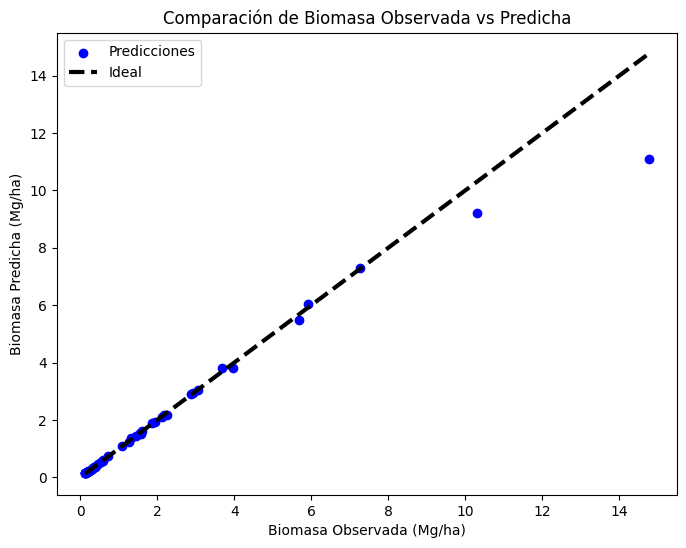

In [ ]:
# @title Modelo de predicción  XGBoost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Cargar los datos (ajusta la ruta y el nombre del archivo)
dataframemg = dataframemg

# Filtramos para evitar NaNs
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características (ejemplo: numéricas)
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [0, 1, 10]  # L2 regularization
}

# Realizar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado por Grid Search
best_model = grid_search.best_estimator_

# Predicciones
y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor Modelo: {best_model}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Gráfico de comparación de predicciones vs valores reales
# ... (código original)
# Gráfico de comparación de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de Biomasa Observada vs Predicha')
plt.legend()
plt.show()


Mean Squared Error (MSE): 0.5061656111963299
R-squared (R2): 0.9348672905003449


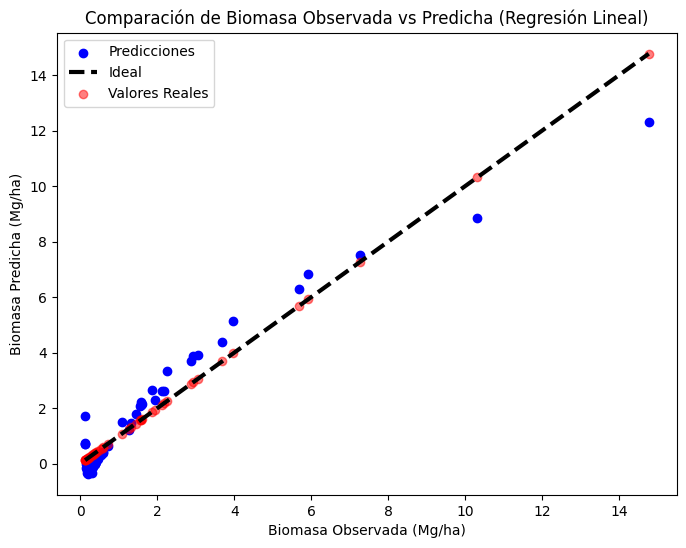

In [ ]:
# @title Modelo de predicción de RL(Nuevo)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#import mplcursors

# Asegúrate de que 'dataframemg' contiene las columnas 'Biomasa' y 'NDVI'
# Filtramos para evitar NaNs en los datos
dataframemg = dataframemg.dropna(subset=['Biomasa (Mg/ha)', 'NDVI'])

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características (ejemplo: numéricas)
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = lr_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Gráfico de comparación de predicciones vs valores reales
plt.figure(figsize=(8, 6))

# Graficar predicciones
scatter_pred = plt.scatter(y_test, y_pred, color='blue', label='Predicciones')

# Graficar la línea ideal (valores reales)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')

# Añadir los valores reales (en rojo) para mayor claridad
scatter_real = plt.scatter(y_test, y_test, color='red', label='Valores Reales', alpha=0.5)

plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de Biomasa Observada vs Predicha (Regresión Lineal)')
plt.legend()

# Añadir tooltips interactivos con mplcursors
'''cursor = mplcursors.cursor(scatter_pred, highlight=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f"Observada: {sel.target[0]:.2f}\nPredicha: {sel.target[1]:.2f}"
))'''

plt.show()


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mean Squared Error (MSE): 0.07251233303317384
R-squared (R2): 0.9906692105940795


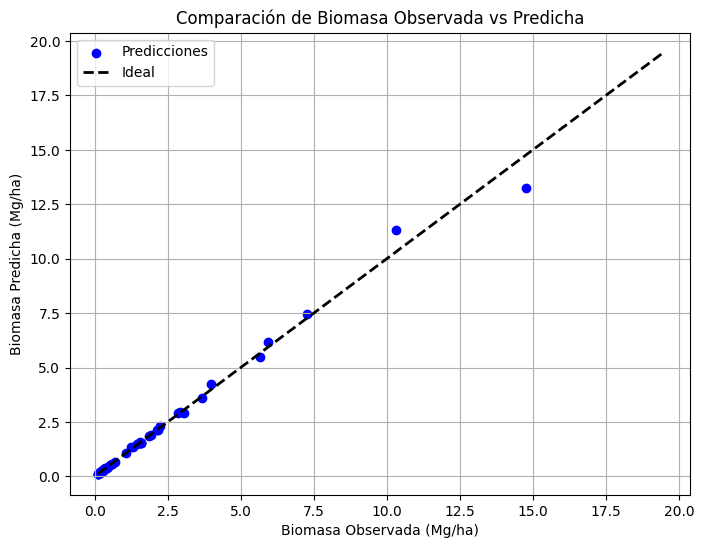

In [ ]:
# @title Modelo de prediccion Random Forest
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Cargar los datos (ajusta la ruta y el nombre del archivo)
dataframemg = dataframemg

# Filtramos para evitar NaNs
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características (ejemplo: numéricas)
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Definir y entrenar un modelo Random Forest con búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor estimador
best_rf = grid_search.best_estimator_

# Predicción y evaluación del modelo
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Visualización de resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de Biomasa Observada vs Predicha')
plt.legend()
plt.grid(True)
plt.show()


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits


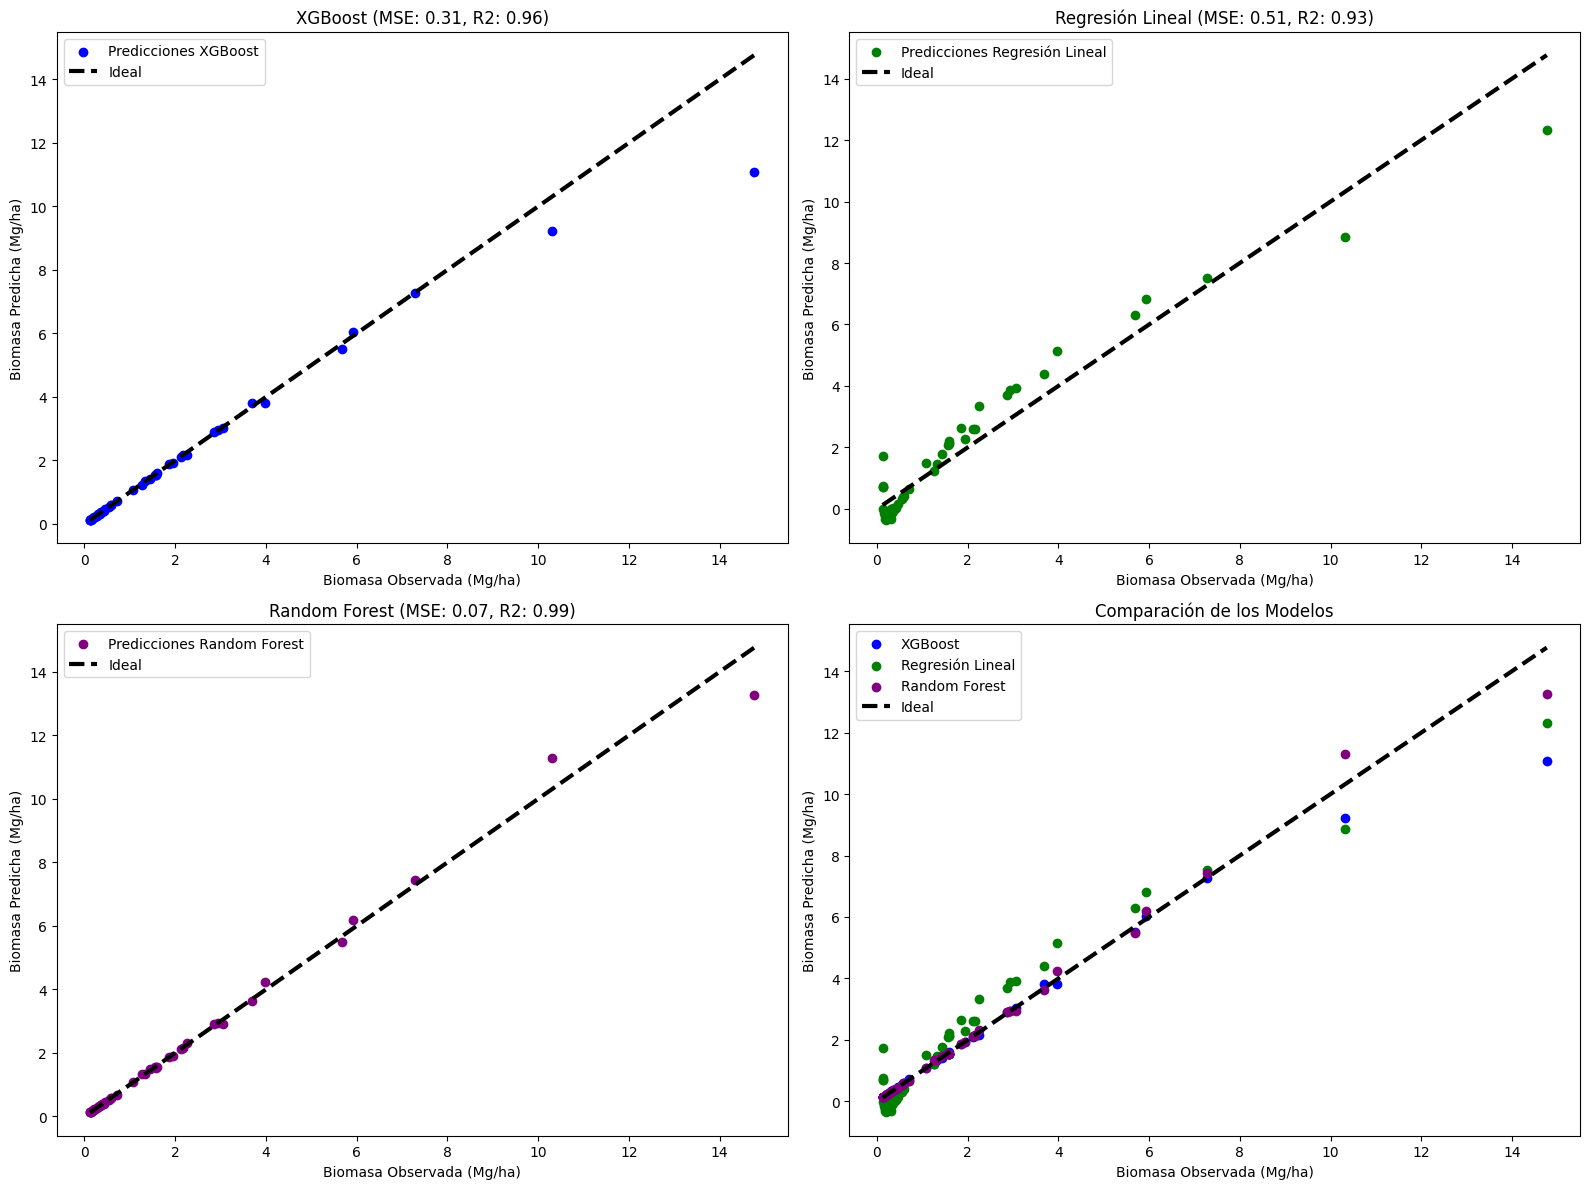

In [ ]:
# @title Comparativo RL - RF - XGBoost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Cargar los datos y asegurarse de que no haya NaNs
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modelo 1: XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 1, 10]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_

# Predicciones y evaluación
y_pred_xgb = best_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

### Modelo 2: Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

### Modelo 3: Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Predicciones y evaluación
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

### Gráficas de comparación
plt.figure(figsize=(16, 12))

# Gráfico XGBoost
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_xgb, color='blue', label='Predicciones XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title(f'XGBoost (MSE: {mse_xgb:.2f}, R2: {r2_xgb:.2f})')
plt.legend()

# Gráfico Regresión Lineal
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_lr, color='green', label='Predicciones Regresión Lineal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title(f'Regresión Lineal (MSE: {mse_lr:.2f}, R2: {r2_lr:.2f})')
plt.legend()

# Gráfico Random Forest
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_rf, color='purple', label='Predicciones Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title(f'Random Forest (MSE: {mse_rf:.2f}, R2: {r2_rf:.2f})')
plt.legend()

# Comparación de los tres modelos
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_xgb, color='blue', label='XGBoost')
plt.scatter(y_test, y_pred_lr, color='green', label='Regresión Lineal')
plt.scatter(y_test, y_pred_rf, color='purple', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de los Modelos')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
dataframemg

,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt),Biomasa (kg),Biomasa (Mg),Biomasa (Mg/ha),NDVI,NDVI_DAP,HT_NDVI
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.1,10.2,39.00,0.0,0,0.0,15.00,555.487004,555487.004312,32705.384151,0.624996,0.016026,9.374933
8,2,4.6910075 -75.6574188 1824 0,4.691008,-75.657419,1824.0,0.0,18.27,217.0,3 m,0.0,6.00,120.412802,120412.802268,7089.539313,0.595261,0.032581,3.571564
9,2,4.69102793 -75.65742622 1835 1,4.691028,-75.657426,1835.0,1.0,18.60,72.0,2.50 m,0.0,6.88,124.820105,124820.104739,7349.027869,0.595261,0.032003,4.095393
10,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,8.33,62.0,3.50,0.0,6.50,28.205152,28205.151708,1660.633488,0.595261,0.071460,3.869194
11,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,3.80,62.0,4,0.0,2.30,10.734888,10734.887830,632.037523,0.595261,0.156648,1.369100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.25,331.0,17,0.0,7.00,14.731296,14731.296160,867.333882,0.595261,0.113383,4.166825
449,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,7.32,327.0,17.5,0.0,8.00,23.049784,23049.783942,1357.101125,0.595261,0.081320,4.762085
450,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,6.49,327.0,17,0.0,7.00,19.354264,19354.264222,1139.520171,0.595261,0.091720,4.166825
451,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.72,325.0,18,0.0,8.00,16.356897,16356.896954,963.044309,0.595261,0.104067,4.762085
